# Import the libraries

In [23]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For data visualization
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [25]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import statsmodels
import sklearn

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("statsmodels:", statsmodels.__version__)
print("scikit-learn:", sklearn.__version__)

import sys
print("Python version:", sys.version)



pandas: 2.1.4
numpy: 1.26.4
matplotlib: 3.8.0
seaborn: 0.12.2
statsmodels: 0.14.0
scikit-learn: 1.2.2
Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


# Import the dataset

In [2]:
# Load dataset
data = pd.read_csv("download.csv", parse_dates=["dteday"])

In [3]:
# Display first few row
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Prepare data

In [5]:
# Define mapping for categories
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weathersit_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain/Snow'
}
weekday_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

# Apply mapping to category columns
data['season'] = data['season'].map(season_map)
data['weathersit'] = data['weathersit'].map(weathersit_map)
data['weekday'] = data['weekday'].map(weekday_map)

# Marking category column for processing
data['mnth'] = data['mnth'].astype('category')
data['weekday'] = data['weekday'].astype('category')
data['season'] = data['season'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')

# Cleanup irrelavent columns for processing
data_clean = data.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# Split category columns into dummy columns for processing
data_final = pd.get_dummies(data_clean, drop_first=True)

In [6]:
# Display original data set
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,Saturday,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,Sunday,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,Monday,1,Clear/Few clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,Tuesday,1,Clear/Few clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,Wednesday,1,Clear/Few clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Display final dataset for processing
data_final.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow/Light Rain,weathersit_Mist/Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


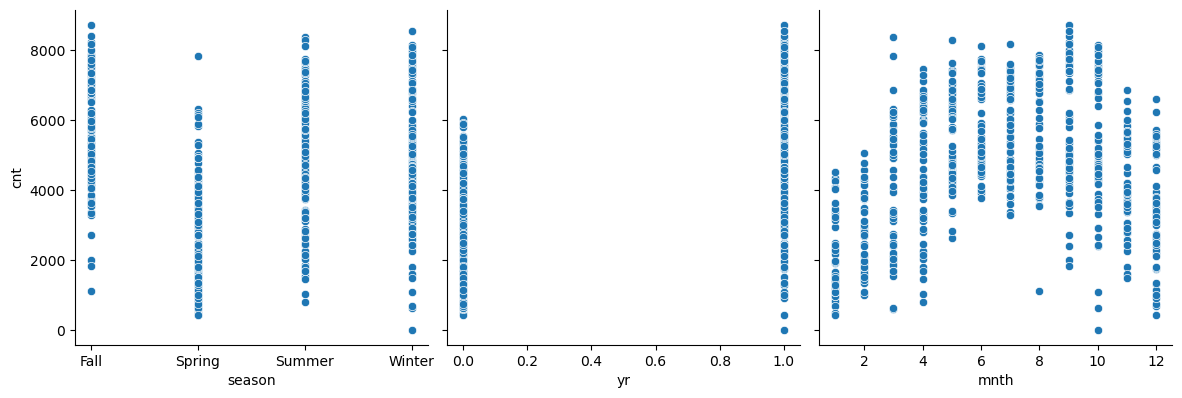

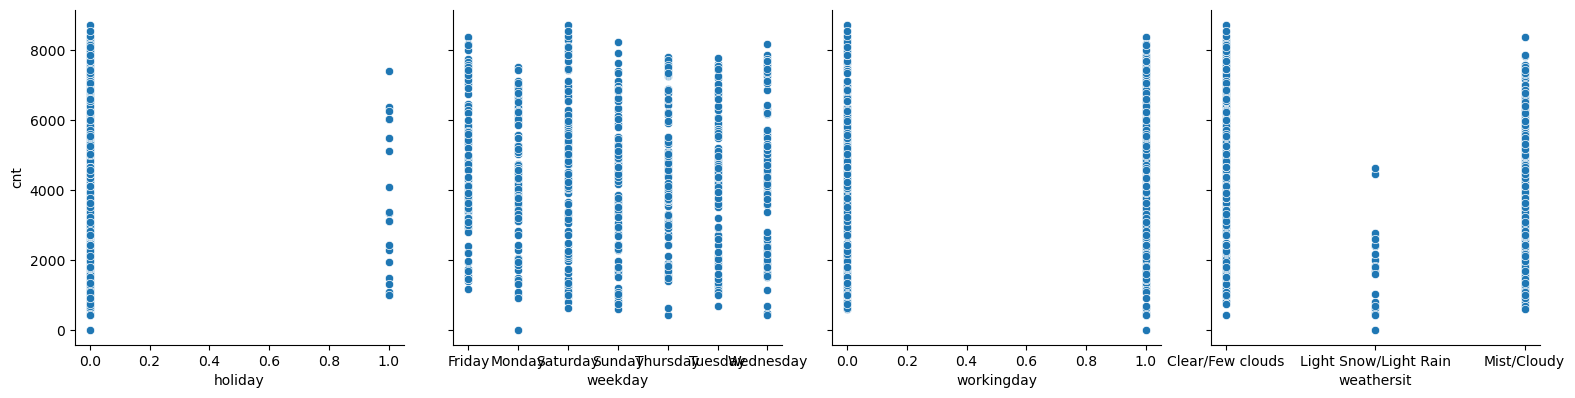

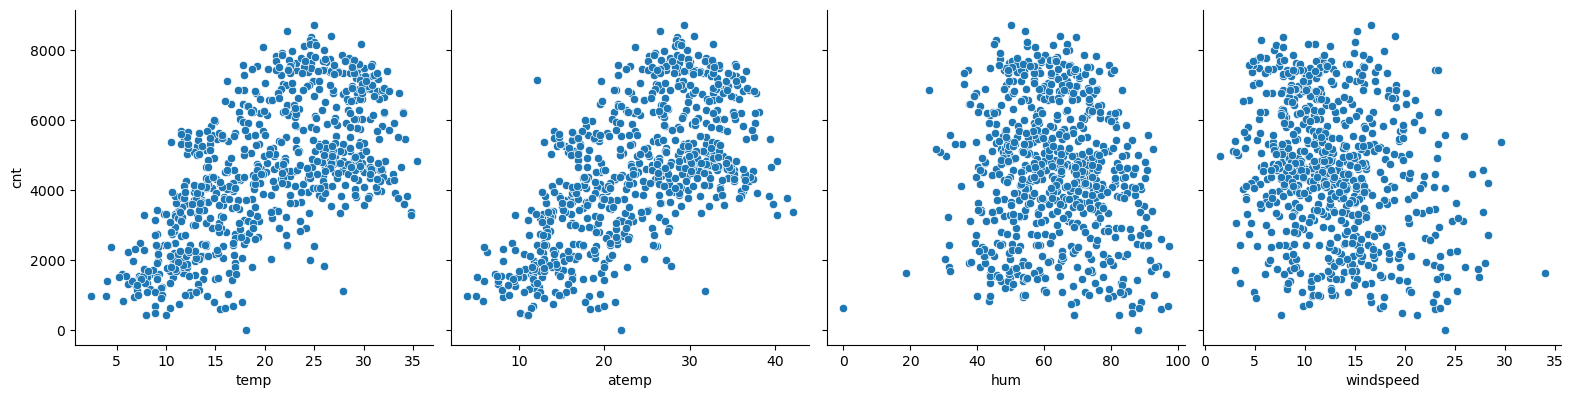

In [8]:
# Visualize the relationship with pairplot
sns.pairplot(data, x_vars=['season','yr','mnth'], y_vars='cnt',height=4, aspect=1, kind='scatter')
sns.pairplot(data, x_vars=['holiday','weekday','workingday','weathersit'], y_vars='cnt',height=4, aspect=1, kind='scatter')
sns.pairplot(data, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt',height=4, aspect=1, kind='scatter')

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000


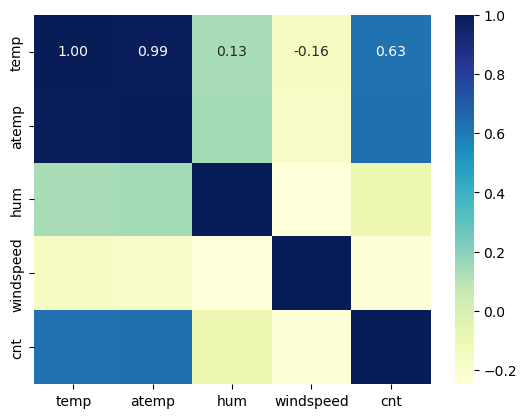

In [9]:
# Visualize corellation using heatmap
corr_map = data[['temp','atemp','hum','windspeed','cnt']].corr();
print(corr_map)
sns.heatmap(corr_map, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()

# Preparing the model

In [10]:
# Define the independent variable X and target variable y
X = data_final.drop(columns='cnt')
y = data_final['cnt']

X = X.astype(float)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training dataset")
print(X_train.shape)
print(y_train.shape)

print("Test dataset")
print(X_test.shape)
print(y_test.shape)

Training dataset
(584, 29)
(584,)
Test dataset
(146, 29)
(146,)


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                730 non-null    float64
 1   holiday                           730 non-null    float64
 2   workingday                        730 non-null    float64
 3   temp                              730 non-null    float64
 4   atemp                             730 non-null    float64
 5   hum                               730 non-null    float64
 6   windspeed                         730 non-null    float64
 7   season_Spring                     730 non-null    float64
 8   season_Summer                     730 non-null    float64
 9   season_Winter                     730 non-null    float64
 10  mnth_2                            730 non-null    float64
 11  mnth_3                            730 non-null    float64
 12  mnth_4  

In [12]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train_sm).fit()

In [13]:
# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          3.46e-203
Time:                        23:54:58   Log-Likelihood:                -4712.0
No. Observations:                 584   AIC:                             9482.
Df Residuals:                     555   BIC:                             9609.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

# Refine the model

In [14]:
# Drop the variable with highest p-value (Backward Elimination Loop)
X_train_refined = X_train.drop(columns=['weekday_Wednesday','mnth_8', 'season_Summer', 'mnth_2', 'weekday_Thursday', 'atemp',
                                        'mnth_6', 'mnth_4', 'mnth_10', 'weekday_Tuesday','holiday', 'weekday_Sunday', 'weekday_Monday'], inplace=False)

# Rebuild model
X_train_sm = sm.add_constant(X_train_refined)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     187.2
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          5.12e-214
Time:                        23:54:58   Log-Likelihood:                -4717.2
No. Observations:                 584   AIC:                             9468.
Df Residuals:                     567   BIC:                             9543.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

# Residual Analysis

In [15]:
# Predict y values from training set
y_train_pred = model.predict(X_train_sm)

# Calculate residuals
residuals_raw = y_train - y_train_pred

# Clean residuals: drop inf and NaN values
residuals = residuals_raw.replace([np.inf, -np.inf], np.nan).dropna()

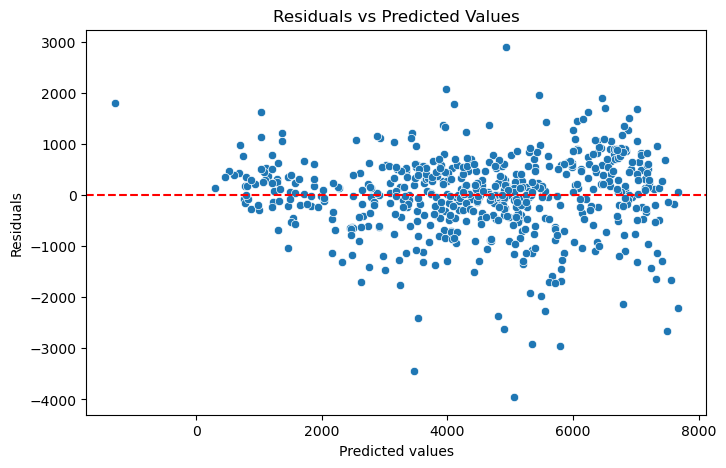

In [16]:
# Plot residuals vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

- The residuals are not showing any pattern thus the model is **Linear**
- The spread of the residuals are more or less consistant, thus the **Homoscedastic**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


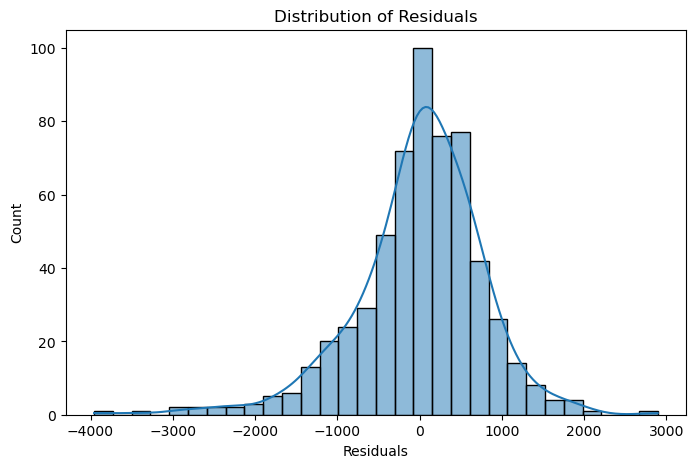

In [17]:
# Histogram to check for normality
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

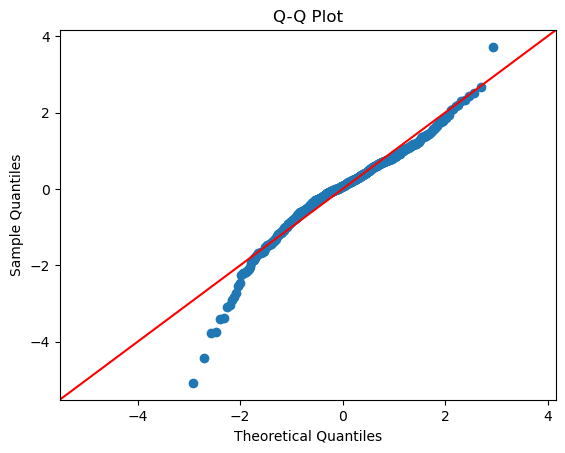

In [18]:
# Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot")
plt.show()

- The reseduals are **Normally Distributed**

# Make prediction on the test dataset

In [19]:
# Prepare test data
X_test_refined = X_test.drop(columns=['weekday_Wednesday','mnth_8', 'season_Summer', 'mnth_2', 'weekday_Thursday', 'atemp',
                                        'mnth_6', 'mnth_4', 'mnth_10', 'weekday_Tuesday','holiday', 'weekday_Sunday', 'weekday_Monday'], inplace=False)

# Adding a constant to test data
X_test_sm = sm.add_constant(X_test_refined)

# Predict on test set
y_test_pred = model.predict(X_test_sm)

# Calculating R-squared

In [20]:
r2 = r2_score(y_test, y_test_pred)
print("R-squared on Test Set:", round(r2, 4))

R-squared on Test Set: 0.8573


The R-squared on the Test Set is 0.8573, which means
- The model explains 85.73% of the variance in the unknown data
- The model is not overfitted as the R-squared value on the test set is not lower than the training set

# Model Summary

In this project, I built a multiple linear regression model to predict the daily demand for shared bikes using historical data provided by BoomBikes. After carefully cleaning the data, performing exploratory analysis, and encoding categorical variables, I selected a refined set of independent variables that significantly impact bike demand.

I began with a full feature set and used **backward elimination** to remove statistically insignificant variables (p-value > 0.05). The final model included **16 predictors** and achieved:

- **Adju-squaredted R² on training data: 0.836**-squared
- **R² on test data3: 0.857**

These results show that the model generalizes well and captures5.73around 86% of the variance in unseen demand data, with no signs of overfitting.

I also conducted a **residual analysis**, which indicated:
- Residuals followed an approximately normal distribution.
- No visible patterns or heteroscedasticity in rerity concerns.

Key factors influencing demand included:
- **Year**, **temperature**, **humidity**, and **windspeed**
- Seasonal and monthly effects, particularly in **spring** and **winter**
- **Weather conditions**, especially on days with light snow or rain
- **Working days** and **Saturdays**, which showed strong positive effects

Overall, the model offers meaningful insights into demand drivers and can be used by BoomBikes to guide business decisions and improve frecasting strategies.
